# Non-IQ investigation

In [1]:
# . Honours Module Folder
# ├ FYPLibrary
# | ├ file_reading.py
# | └ IQ_demod.py
# └ Sub Project folder i.e.: os.path.abspath('')
#   ├ this notebook(.ipynb)
#   └ "Batch" folder
#     └ C2-xxxHz-xxxmVpp-80.125xxxMHz-comment.txt

# Initialization: Directory appending for my system. Vary the directories as necessary.
import sys
import os.path
# Add the FYPLibrary folder in the same level as this folder.
parent_dir = os.path.dirname(os.path.abspath(''))
if os.path.join(parent_dir, 'FYPLibrary') not in sys.path:
    sys.path.append(os.path.join(parent_dir, 'FYPLibrary'))
del parent_dir

# from pprint import pprint
# pprint(sys.path)

# within this jupyter notebook
from os import listdir
from file_reading import *
from IQ_demod import *
import numpy as np
import matplotlib.pyplot as plt

['d:\\NUS\\Semester 7\\PC4199 Honours Project\\20220125 NonIQtest',
 'c:\\Users\\Thormund\\.vscode\\extensions\\ms-toolsai.jupyter-2021.11.1001550889\\pythonFiles',
 'c:\\Users\\Thormund\\.vscode\\extensions\\ms-toolsai.jupyter-2021.11.1001550889\\pythonFiles\\lib\\python',
 'C:\\Program Files\\Python38\\python38.zip',
 'C:\\Program Files\\Python38\\DLLs',
 'C:\\Program Files\\Python38\\lib',
 'C:\\Program Files\\Python38',
 '',
 'C:\\Users\\Thormund\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\Thormund\\AppData\\Roaming\\Python\\Python38\\site-packages\\win32',
 'C:\\Users\\Thormund\\AppData\\Roaming\\Python\\Python38\\site-packages\\win32\\lib',
 'C:\\Users\\Thormund\\AppData\\Roaming\\Python\\Python38\\site-packages\\Pythonwin',
 'C:\\Program Files\\Python38\\lib\\site-packages',
 'C:\\Users\\Thormund\\AppData\\Roaming\\Python\\Python38\\site-packages\\IPython\\extensions',
 'C:\\Users\\Thormund\\.ipython',
 'd:\\NUS\\Semester 7\\PC4199 Honours Project\\FYPLibra

In [3]:
# Step 1: Change the name to which the folder you wish to read from
# Yield all files in batch folder
# .\20210914 Oscilliscope Reading Attempt 2\Nis5data
folderpath = os.path.join(os.path.dirname(os.path.abspath('')),'20210914 Oscilliscope Reading Attempt 2\\Nis5data')

files = listdir(path= folderpath)
for i, f in enumerate(files):
    print(f"{i:>3}: {f}")

  0: C280.020Mhz100kS-nothing00000.txt
  1: C280.020Mhz100kS-nothing00001.txt
  2: C280.020Mhz100kS-tapping00000.txt
  3: C280.020Mhz100kS-tapping00001.txt


In [14]:
my_input = 3

if my_input != -1:
    file = files[my_input]

NAME = file
TXT_FILE_PATH = file_str_to_path(NAME, dir= folderpath)

In [15]:
SIGNAL_F = 80.020e6*2 #Hz 
SAMPLING_F = 1.0e5 #Hz
ph_ad = phase_advance(SIGNAL_F, SAMPLING_F) # phase advance = 2*pi/N
N, _ = freq_ratio(signal=SIGNAL_F, sample=SAMPLING_F)
print(f"{N = }")

N = 5


In [16]:
meta, trace = fr.parse_and_read_oscilliscope_txt(TXT_FILE_PATH)
signal = signal_from_trace(np.asarray(trace))

[Notice] Ignore the following mixed types warning.


C:\Users\Thormund\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3377: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [22]:
phases_accum = signal_to_phase(signal, N, 2*pi/N, phase_advancement_correction=False)
print(f"{phases_accum[:10] = }")
phases_accum = phase_reconstruction_2(phases_accum, 2*pi/N, False)
print(f"{phases_accum[:10] = }")
t_axis = np.arange(start= 0, 
    stop= (int(meta["Record Length"][0])-N) * meta['Sample Interval'][0], step= meta['Sample Interval'][0])

phases_accum[:10] = array([ 2.22987815, -1.73250537, -2.88825842, -2.97246179, -0.94926986,
        2.26305476, -1.44477657,  0.55883285, -0.10085422,  0.49146643])
phases_accum[:10] = array([ 2.22987815,  3.2940429 ,  0.88165267, -0.45918779,  0.3073671 ,
        2.26305463,  3.58177151,  4.32874383,  2.4124197 ,  1.74810328])


Text(0.5, 1.0, 'Phase Reconstruction 2')

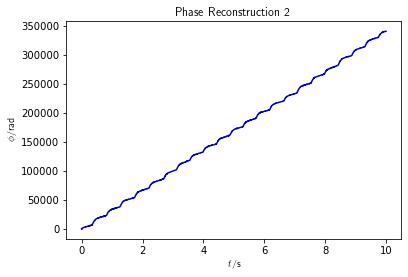

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t_axis, phases_accum, color = 'mediumblue')
ax.set_ylabel(r'$\phi$/rad', useTex = True)
ax.set_xlabel(r'$t$/s', useTex = True)
plt.title(f"Phase Reconstruction 2", \
    useTex= True )